# EDA cho các file trong raw_reviews
Phân tích dữ liệu khám phá (EDA) cho các file dữ liệu thô chứa review.

In [26]:
# Import thư viện cần thiết
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# Đường dẫn tới thư mục raw_reviews
raw_reviews_dir = "Raw_reviews"
file_paths = glob.glob(os.path.join(raw_reviews_dir, "*.csv"))
print("Các file trong raw_reviews:", file_paths)

Các file trong raw_reviews: ['Raw_reviews\\tiki_reviews_book.csv', 'Raw_reviews\\tiki_reviews_food&drink.csv', 'Raw_reviews\\tiki_reviews_health&beauty.csv', 'Raw_reviews\\tiki_reviews_sport.csv', 'Raw_reviews\\tiki_reviews_stationery.csv']


In [28]:
# Đọc và tổng hợp thông tin các file
dfs = {}
file_rows = []
for path in file_paths:
    name = os.path.basename(path)
    df = pd.read_csv(path)
    dfs[name] = df
    file_rows.append({"file": name, "rows": df.shape[0]})
    print(f"{name}: {df.shape[0]} dòng, {df.shape[1]} cột")
# Gộp tất cả các file thành 1 DataFrame tổng hợp
df_all = pd.concat(dfs.values(), ignore_index=True)

tiki_reviews_book.csv: 3005 dòng, 8 cột
tiki_reviews_food&drink.csv: 3030 dòng, 8 cột
tiki_reviews_health&beauty.csv: 3004 dòng, 8 cột
tiki_reviews_sport.csv: 3031 dòng, 8 cột
tiki_reviews_stationery.csv: 3016 dòng, 8 cột


## Thông tin tổng quan về từng file
Hiển thị thông tin tổng quan (info, missing values) cho từng file.

In [29]:
for name, df in dfs.items():
    print(f"--- {name} ---")
    display(df.info())
    display(df.isnull().sum())
    print()

--- tiki_reviews_book.csv ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3005 entries, 0 to 3004
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_name     3000 non-null   object
 1   rating        3005 non-null   int64 
 2   comment       2940 non-null   object
 3   images        3005 non-null   object
 4   created_at    3005 non-null   object
 5   thank_count   3005 non-null   int64 
 6   product_id    3005 non-null   int64 
 7   product_name  3005 non-null   object
dtypes: int64(3), object(5)
memory usage: 187.9+ KB


None

user_name        5
rating           0
comment         65
images           0
created_at       0
thank_count      0
product_id       0
product_name     0
dtype: int64


--- tiki_reviews_food&drink.csv ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3030 entries, 0 to 3029
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_name     3027 non-null   object
 1   rating        3030 non-null   int64 
 2   comment       2961 non-null   object
 3   images        3030 non-null   object
 4   created_at    3030 non-null   object
 5   thank_count   3030 non-null   int64 
 6   product_id    3030 non-null   int64 
 7   product_name  3030 non-null   object
dtypes: int64(3), object(5)
memory usage: 189.5+ KB


None

user_name        3
rating           0
comment         69
images           0
created_at       0
thank_count      0
product_id       0
product_name     0
dtype: int64


--- tiki_reviews_health&beauty.csv ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3004 entries, 0 to 3003
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_name     3002 non-null   object
 1   rating        3004 non-null   int64 
 2   comment       2954 non-null   object
 3   images        3004 non-null   object
 4   created_at    3004 non-null   object
 5   thank_count   3004 non-null   int64 
 6   product_id    3004 non-null   int64 
 7   product_name  3004 non-null   object
dtypes: int64(3), object(5)
memory usage: 187.9+ KB


None

user_name        2
rating           0
comment         50
images           0
created_at       0
thank_count      0
product_id       0
product_name     0
dtype: int64


--- tiki_reviews_sport.csv ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3031 entries, 0 to 3030
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_name     3029 non-null   object
 1   rating        3031 non-null   int64 
 2   comment       2987 non-null   object
 3   images        3031 non-null   object
 4   created_at    3031 non-null   object
 5   thank_count   3031 non-null   int64 
 6   product_id    3031 non-null   int64 
 7   product_name  3031 non-null   object
dtypes: int64(3), object(5)
memory usage: 189.6+ KB


None

user_name        2
rating           0
comment         44
images           0
created_at       0
thank_count      0
product_id       0
product_name     0
dtype: int64


--- tiki_reviews_stationery.csv ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3016 entries, 0 to 3015
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_name     3013 non-null   object
 1   rating        3016 non-null   int64 
 2   comment       2975 non-null   object
 3   images        3016 non-null   object
 4   created_at    3016 non-null   object
 5   thank_count   3016 non-null   int64 
 6   product_id    3016 non-null   int64 
 7   product_name  3016 non-null   object
dtypes: int64(3), object(5)
memory usage: 188.6+ KB


None

user_name        3
rating           0
comment         41
images           0
created_at       0
thank_count      0
product_id       0
product_name     0
dtype: int64

### Biểu đồ số lượng review theo file

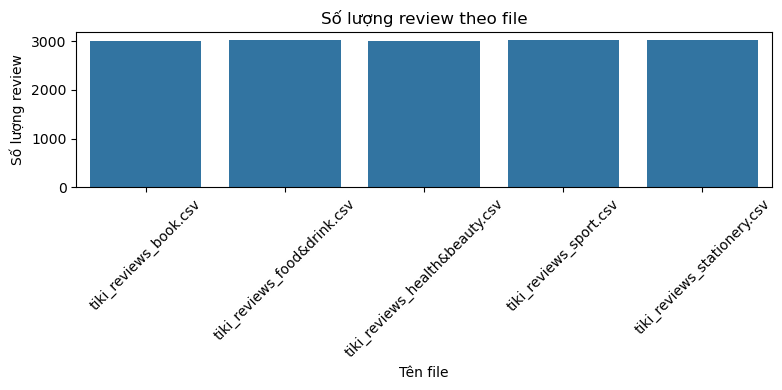

In [30]:
# Vẽ biểu đồ số lượng review theo file (giữ nguyên)
if file_rows:
    file_rows_df = pd.DataFrame(file_rows)
    plt.figure(figsize=(8,4))
    sns.barplot(x="file", y="rows", data=file_rows_df)
    plt.title("Số lượng review theo file")
    plt.xlabel("Tên file")
    plt.ylabel("Số lượng review")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### Biểu đồ missing values cho tất cả trường dữ liệu

### Biểu đồ số lượng missing value cho từng cột

In [ ]:
# Biểu đồ số lượng missing value cho từng cột (kể cả cột không có missing)
missing_all = df_all.isnull().sum()
plt.figure(figsize=(8,3))
sns.barplot(x=missing_all.index, y=missing_all.values)
plt.title("Số lượng missing value cho từng cột (toàn bộ dữ liệu)")
plt.ylabel("Số lượng missing")
plt.xlabel("Cột")
plt.show()

## Phân tích độ dài review
Thống kê độ dài các review (số ký tự).

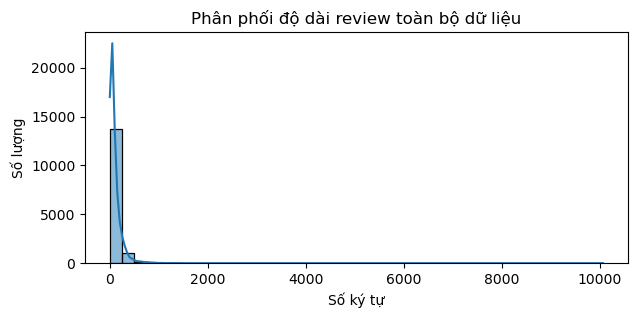

In [40]:
# Thêm cột độ dài review cho toàn bộ dữ liệu
if 'review' in df_all.columns or 'comment' in df_all.columns:
    review_col = 'review' if 'review' in df_all.columns else 'comment'
    df_all['review_length'] = df_all[review_col].astype(str).apply(len)
    plt.figure(figsize=(7,3))
    sns.histplot(df_all['review_length'], bins=40, kde=True)
    plt.title("Phân phối độ dài review toàn bộ dữ liệu")
    plt.xlabel("Số ký tự")
    plt.ylabel("Số lượng")
    plt.show()

### Boxplot độ dài review tổng quan

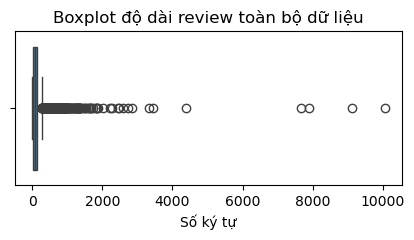

In [43]:
# Vẽ boxplot độ dài review tổng quan
if 'review_length' in df_all.columns:
    plt.figure(figsize=(5,2))
    sns.boxplot(x=df_all['review_length'])
    plt.title("Boxplot độ dài review toàn bộ dữ liệu")
    plt.xlabel("Số ký tự")
    plt.show()

## Phân phối rating tổng quan (nếu có)

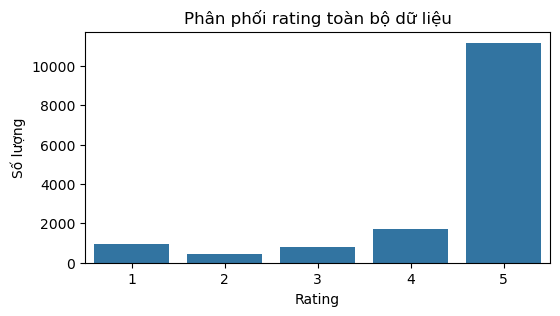

In [34]:
# Vẽ biểu đồ phân phối rating tổng quan
if 'rating' in df_all.columns:
    plt.figure(figsize=(6,3))
    sns.countplot(x='rating', data=df_all)
    plt.title("Phân phối rating toàn bộ dữ liệu")
    plt.xlabel("Rating")
    plt.ylabel("Số lượng")
    plt.show()

### Boxplot rating tổng quan (nếu có)

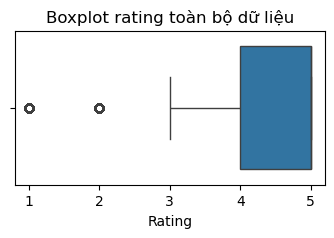

In [35]:
# Vẽ boxplot rating tổng quan
if 'rating' in df_all.columns:
    plt.figure(figsize=(4,2))
    sns.boxplot(x=df_all['rating'])
    plt.title("Boxplot rating toàn bộ dữ liệu")
    plt.xlabel("Rating")
    plt.show()

## Một số ví dụ review

In [36]:
for name, df in dfs.items():
    print(f"--- {name} ---")
    if 'review' in df.columns:
        display(df[['review']].sample(5, random_state=42))
    elif 'comment' in df.columns:
        display(df[['comment']].sample(5, random_state=42))

--- tiki_reviews_book.csv ---


,comment
436,hàng giao nhanh nhưng sách của mình lại được b...
1872,bao bì đẹp nhưng mình cứ có cảm giác dễ bung k...
2630,Nhìn vào thì ai dám nói đây là sách mới :) khô...
2533,Giao hàng nhanh dù trong thời điểm dịch nhạy c...
1506,"Một cuốn sách ở khắp nơi trên toàn thế giới, b..."


--- tiki_reviews_food&drink.csv ---


,comment
1207,Ship lẹ
256,Sp tốt cần mua thì tiki giao hàng rất nhanh và...
2356,Hàng đóng gói kỹ. Giao hàng nhanh. Thỉnh thoản...
175,"DẦu ăn ngon lắm, chất lượng cao, ngày sản xuất..."
211,"sản phẩm dùng tốt, chỉ có điều không có hướng ..."


--- tiki_reviews_health&beauty.csv ---


,comment
727,Mình dùng kem rửa mặt loại này cùng với serum ...
2379,"Chất lượng sản phẩm tốt, đóng gói kỹ càng, vận..."
175,"Xài cũng tạm ổn, không giữ ẩm nhiều cho lắm"
52,Mình đã sử dụng máy này được khoảng 4-5 tháng ...
581,Good


--- tiki_reviews_sport.csv ---


,comment
1207,bạn ơi giày nhỏ quá có đổi lại được không
256,Okie khá ổn khá ổn khá ổn
2357,"Hàng tốt đẹp đóng gói kỹ, đang xài thấy oke lắ..."
175,Giao hàng nhanh. Hàng xài tốt. Nhưng không biế...
211,"Đẹp, rất đáng mua"


--- tiki_reviews_stationery.csv ---


,comment
63,"Tốt, săn đc giá rẻ. Giao hỏa tốc siêu nhanh"
2808,Mua 719k thấy giá cũng cao so với các loại khá...
102,Hơi to so với việc chưng yến.
2692,Máy xài rất tốt 👍
416,Xài tốt êm


### Biểu đồ số lượng sample có comment, có ảnh và có cả comment & ảnh

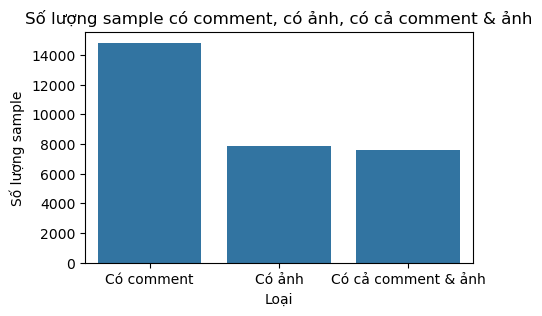

In [49]:
# Thống kê số lượng sample có comment, có ảnh, và có cả comment & ảnh
has_comment = df_all['comment'].notnull()
has_image = df_all['images'].apply(lambda x: isinstance(x, str) and len(eval(x)) > 0 if pd.notnull(x) else False)
has_both = has_comment & has_image

counts = {
    "Có comment": has_comment.sum(),
    "Có ảnh": has_image.sum(),
    "Có cả comment & ảnh": has_both.sum()
}

plt.figure(figsize=(5,3))
sns.barplot(x=list(counts.keys()), y=list(counts.values()))
plt.title("Số lượng sample có comment, có ảnh, có cả comment & ảnh")
plt.ylabel("Số lượng sample")
plt.xlabel("Loại")
plt.show()

### So sánh số lượng và độ dài comment theo các khoảng 50 từ

C:\Users\Sacchi\AppData\Local\Temp\ipykernel_9392\1548480505.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_length_per_bin = df_all.groupby('word_count_bin')['review_length'].mean()


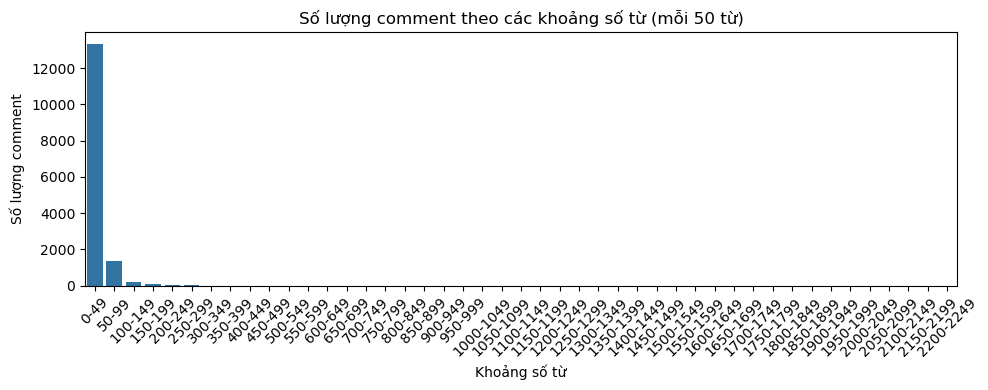

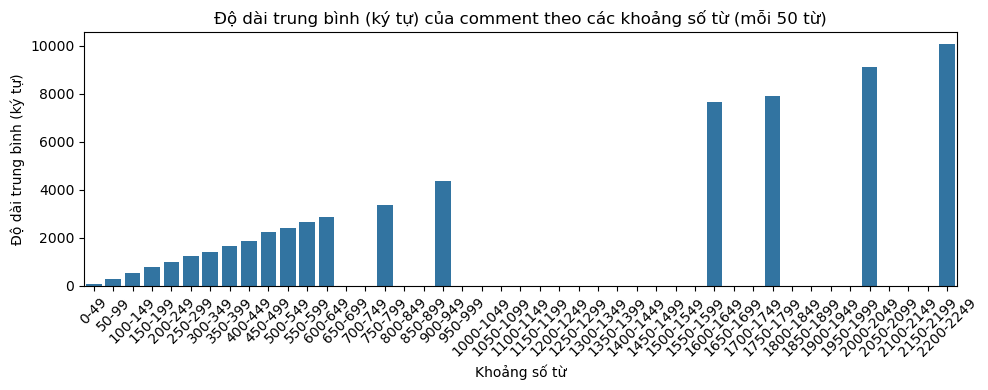

In [50]:
# Tính số từ cho mỗi comment
def count_words(text):
    if pd.isnull(text):
        return 0
    return len(str(text).split())

df_all['comment_word_count'] = df_all['comment'].apply(count_words)

# Tạo các khoảng 50 từ
bins = list(range(0, df_all['comment_word_count'].max() + 51, 50))
labels = [f"{bins[i]}-{bins[i+1]-1}" for i in range(len(bins)-1)]
df_all['word_count_bin'] = pd.cut(df_all['comment_word_count'], bins=bins, labels=labels, right=False, include_lowest=True)

# Đếm số lượng comment trong mỗi khoảng
bin_counts = df_all['word_count_bin'].value_counts().sort_index()

# Tính độ dài trung bình (ký tự) của comment trong mỗi khoảng
avg_length_per_bin = df_all.groupby('word_count_bin')['review_length'].mean()

# Vẽ biểu đồ số lượng comment theo khoảng số từ
plt.figure(figsize=(10,4))
sns.barplot(x=bin_counts.index, y=bin_counts.values)
plt.title("Số lượng comment theo các khoảng số từ (mỗi 50 từ)")
plt.xlabel("Khoảng số từ")
plt.ylabel("Số lượng comment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Vẽ biểu đồ độ dài trung bình (ký tự) của comment theo khoảng số từ
plt.figure(figsize=(10,4))
sns.barplot(x=avg_length_per_bin.index, y=avg_length_per_bin.values)
plt.title("Độ dài trung bình (ký tự) của comment theo các khoảng số từ (mỗi 50 từ)")
plt.xlabel("Khoảng số từ")
plt.ylabel("Độ dài trung bình (ký tự)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### So sánh số lượng và độ dài comment theo các khoảng 200 từ

C:\Users\Sacchi\AppData\Local\Temp\ipykernel_9392\1302876477.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_length_per_bin_200 = df_all.groupby('word_count_bin_200')['review_length'].mean()


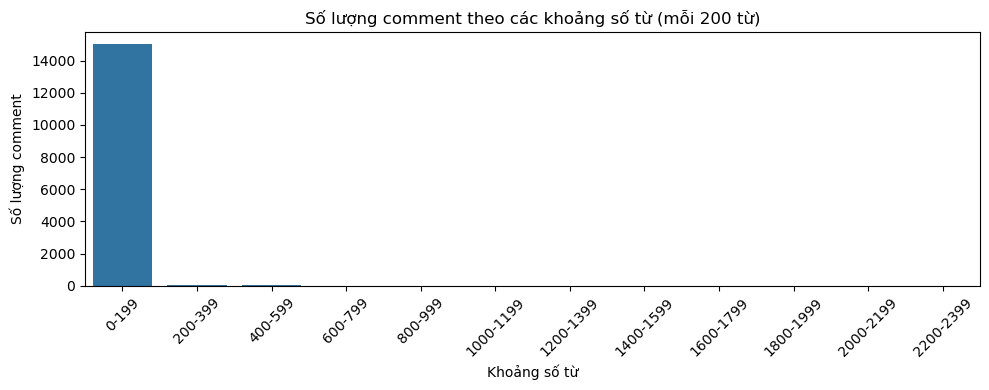

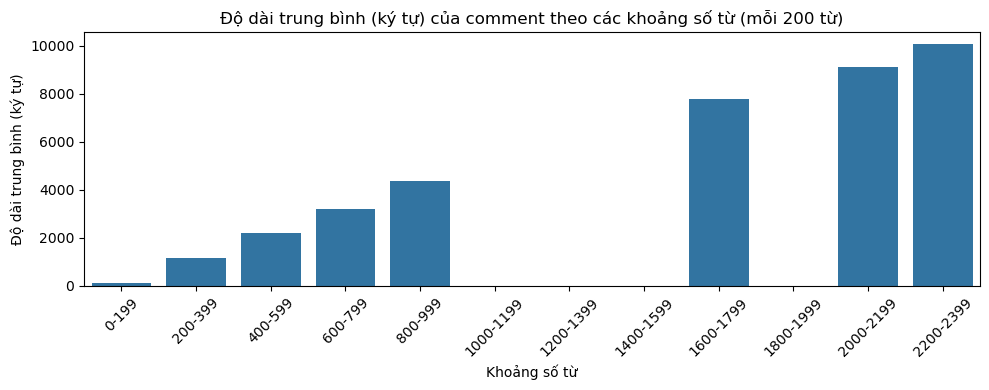

In [51]:
# Tạo các khoảng 200 từ
bins_200 = list(range(0, df_all['comment_word_count'].max() + 201, 200))
labels_200 = [f"{bins_200[i]}-{bins_200[i+1]-1}" for i in range(len(bins_200)-1)]
df_all['word_count_bin_200'] = pd.cut(df_all['comment_word_count'], bins=bins_200, labels=labels_200, right=False, include_lowest=True)

# Đếm số lượng comment trong mỗi khoảng 200 từ
bin_counts_200 = df_all['word_count_bin_200'].value_counts().sort_index()

# Tính độ dài trung bình (ký tự) của comment trong mỗi khoảng 200 từ
avg_length_per_bin_200 = df_all.groupby('word_count_bin_200')['review_length'].mean()

# Vẽ biểu đồ số lượng comment theo khoảng số từ (200 từ)
plt.figure(figsize=(10,4))
sns.barplot(x=bin_counts_200.index, y=bin_counts_200.values)
plt.title("Số lượng comment theo các khoảng số từ (mỗi 200 từ)")
plt.xlabel("Khoảng số từ")
plt.ylabel("Số lượng comment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Vẽ biểu đồ độ dài trung bình (ký tự) của comment theo khoảng số từ (200 từ)
plt.figure(figsize=(10,4))
sns.barplot(x=avg_length_per_bin_200.index, y=avg_length_per_bin_200.values)
plt.title("Độ dài trung bình (ký tự) của comment theo các khoảng số từ (mỗi 200 từ)")
plt.xlabel("Khoảng số từ")
plt.ylabel("Độ dài trung bình (ký tự)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Biểu đồ: Khoảng số comment (trục x) vs Tổng số từ trong các comment thuộc mỗi khoảng (trục y)

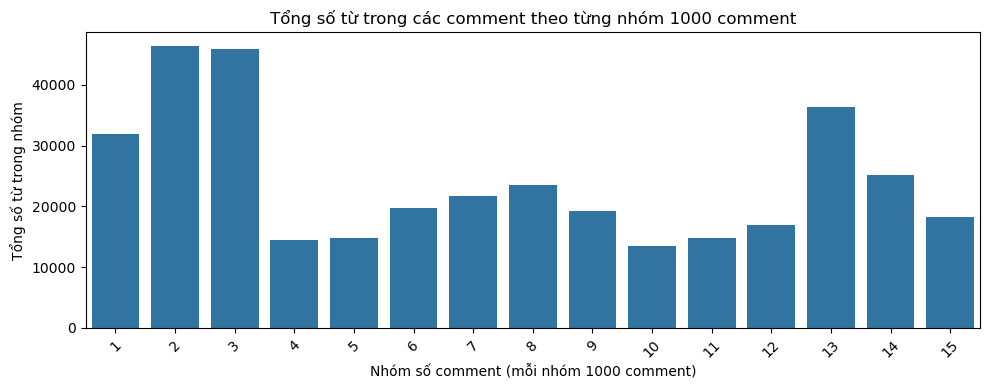

In [52]:
# Gom nhóm theo khoảng số comment (ví dụ: mỗi 1000 comment), tính tổng số từ trong các comment thuộc mỗi nhóm

# Chỉ xét các comment có nội dung
df_valid = df_all[df_all['comment_word_count'] > 0].copy()

# Xác định số lượng comment mỗi nhóm (ví dụ: 1000 comment/nhóm)
group_size = 1000
df_valid = df_valid.reset_index(drop=True)
df_valid['comment_group'] = (df_valid.index // group_size) + 1

# Tính tổng số từ trong mỗi nhóm comment
group_word_sum = df_valid.groupby('comment_group')['comment_word_count'].sum()

plt.figure(figsize=(10,4))
sns.barplot(x=group_word_sum.index.astype(str), y=group_word_sum.values)
plt.title("Tổng số từ trong các comment theo từng nhóm 1000 comment")
plt.xlabel("Nhóm số comment (mỗi nhóm 1000 comment)")
plt.ylabel("Tổng số từ trong nhóm")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()